<a href="https://colab.research.google.com/github/jyoti12-3biradi/Data-Analysis/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (1).csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("House Price Prediction Dataset.csv")

In [ ]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df.shape

(2000, 10)

In [ ]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [ ]:
# removing the unnecessary columns

df = df.drop(columns=['Id'])

In [ ]:
# feature and target separation

x = df.drop(columns=['Price'])
y = df['Price']

# x contains all input features
# y contains the target variable or what we want to predict

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
# train test split  (statisfy)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

In [ ]:
x_train.shape

(1600, 8)

In [ ]:
x_test.shape

(400, 8)

In [ ]:
x_train.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object


In [ ]:
# linear models and reguralization are sensitive to feature
# Scalar so before regression we encode categoricals
# and scale numericals

In [ ]:
categorical_cols = ['Location','Condition','Garage']

numerical_cols = x_train.drop(columns=categorical_cols).columns

In [ ]:
categorical_cols,numerical_cols

(['Location', 'Condition', 'Garage'],
 Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], dtype='object'))

In [ ]:
# we will use oneHostEncoder cuz regression needs numbers
# it increases features=set up regularization need

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# ColumnTransformer is to apply different preprocessing steps to
# different columns in one go because
# numerical cols need scaling, Categorical cols need encoding,
# # so we should not treat all columns the same

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols)
    ]
)
# transformers =[]
# this is list of rules
# each rule follows this feather_format(name,tranformer,columns)

In [ ]:
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [ ]:
x_train_processed.shape

(1600, 12)

In [52]:
x_train_processed.shape

(1600, 12)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [54]:
y_train_pred = lr.predict(x_train_processed)
y_test_pred = lr.predict(x_test_processed)

# predicting on bath so
# train prediction - check how well model learned
# test prediction - check how well model generalizes

# we predict on training data to see learning, in test to
#  see the real world performance
# y_train_pred, y_test_pred

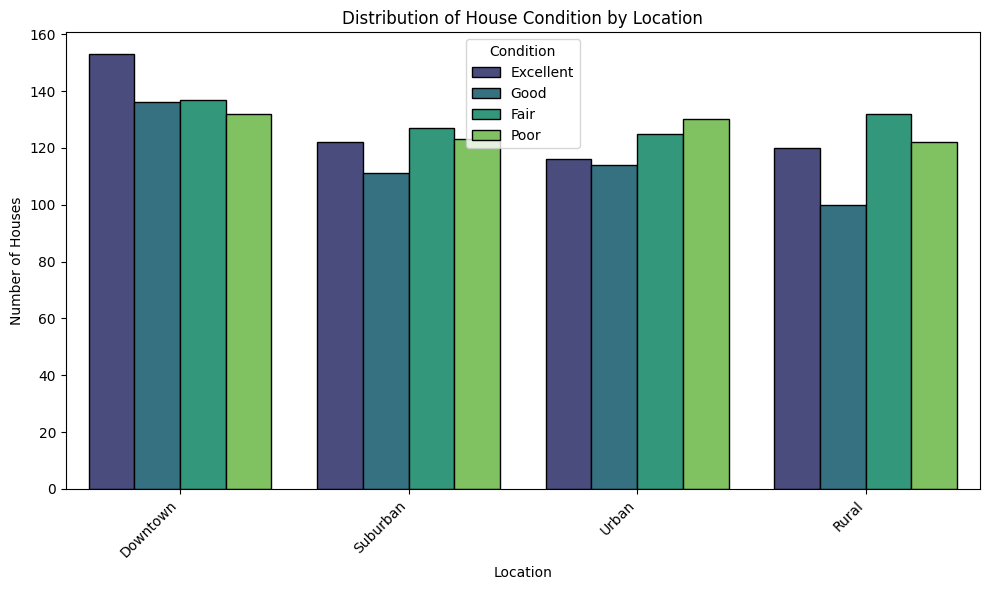

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()